<a href="https://colab.research.google.com/github/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9A%D0%9F_%E2%84%967_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична робота №4-5

###Імпорт основних модулів

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##1. Відібрати на Kaggle.com набір даних, який містить я мінімум 1 категоріальну змінну та одну кількісну.



In [3]:
melb = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/Data/melb_data.csv")

In [4]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


 Видалимо пропуски наступною командою

In [5]:
melb = melb.dropna(subset=['BuildingArea'])
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


##2. На основі кількісної змінної(BuildingArea) згенеруємо нову змінну за правилом: кожен елемент стовпця (по черзі) множиться на випадкове значення від 1 до 5.

In [6]:
# Генерація нової змінної
np.random.seed(0) # Задаємо початкове значення для відтворюваності результатів
melb['NewBuildingArea'] = melb['BuildingArea'] * np.random.randint(1, 6, melb.shape[0])
melb[['BuildingArea', 'NewBuildingArea']].head()

,BuildingArea,NewBuildingArea
1,79.0,395.0
2,150.0,150.0
4,142.0,568.0
6,210.0,840.0
7,107.0,428.0


##3 Порівняти дві категорії з категоріальної змінної за алгоритмом:


In [7]:
melb[melb['Type'].isin(['h', 'u'])]
melb[['Type']]

,Type
1,h
2,h
4,h
6,h
7,h
...,...
13572,h
13573,h
13576,h
13578,h


In [8]:
melb[melb["Type"] == 'h']['BuildingArea'].shape

(4860,)

In [9]:
melb[melb["Type"] == 'u']['BuildingArea'].shape

(1584,)

In [10]:
melb["BuildingArea"].shape

(7130,)

### 3.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

Тест для h

In [11]:
from scipy.stats import kstest, norm

data = melb[melb["Type"] == 'h']['BuildingArea']
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")


Статистика тесту = 0.41161;
p = 0.00000
Дані не мають нормального розподілу


Тест для u

In [12]:
from scipy.stats import kstest, norm

data = melb[melb["Type"] == 'u']['BuildingArea']
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")

Статистика тесту = 0.16886;
p = 0.00000
Дані не мають нормального розподілу


### 3.3. Дати коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.


In [13]:
melb_type = melb[melb["Type"].isin(["h", "u"])].groupby("Type")["BuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4860,176.866248,650.556175
u,1584,80.737121,50.631211


### 3.4. Візуалізувати групи за допомогою ящичкових діаграм.

In [14]:
h = melb[melb["Type"] == "h"]["BuildingArea"]
u = melb[melb["Type"] == "u"]["BuildingArea"]

In [15]:
h.shape

(4860,)

In [16]:
u.shape

(1584,)

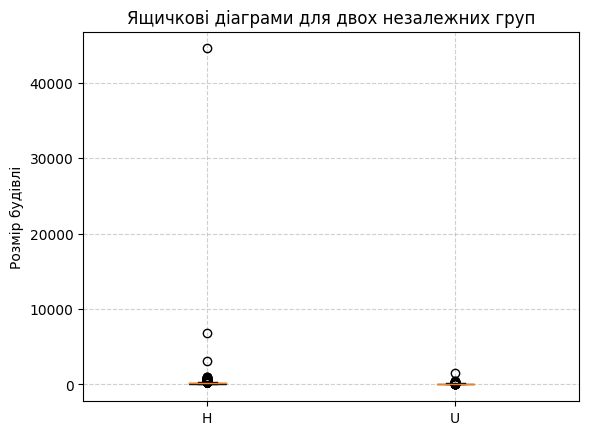

In [17]:
data = [h, u]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=["H", "U"])

# Покращення візуалізації
ax.set_title("Ящичкові діаграми для двох незалежних груп")
ax.set_ylabel ("Розмір будівлі")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Cпробуємо трохи покращити дані, використавши квантильний метод очищення даних від викидів

In [18]:
Q1 = melb['BuildingArea'].quantile(0.25)
Q3 = melb['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1

# Визначення меж
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

# Фільтрація
new_melb = melb[(melb['BuildingArea'] >= low) & (melb['BuildingArea'] <= upp)]

In [19]:
h = new_melb[new_melb["Type"] == "h"]["BuildingArea"]
u = new_melb[new_melb["Type"] == "u"]["BuildingArea"]

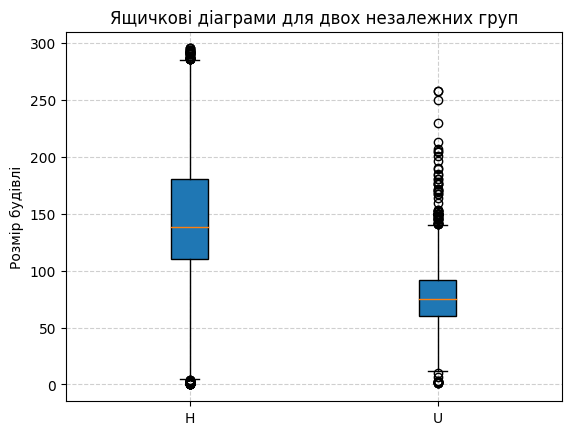

In [20]:
data = [h, u]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=["H", "U"])

# Покращення візуалізації
ax.set_title("Ящичкові діаграми для двох незалежних груп")
ax.set_ylabel ("Розмір будівлі")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [21]:
h.shape

(4520,)

In [22]:
u.shape

(1578,)

Після реалізації алгоритму очищення від викидів, бачимо, що це допомогло. Переконатись в цьому, можемо порівнявши 2 графіки або розміри даних `до/після`

### 3.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.(ОНОВЛЕНО)

In [23]:
melb_type = new_melb[new_melb["Type"].isin(["h", "u"])].groupby("Type")["BuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4520,148.500529,53.723141
u,1578,78.897719,30.060473


### 3.5. Сформувати нульову та альтернативну гіпотези.

Нульова гіпотеза (H0): Немає статистично значущої різниці між середніми цінами будинків (h) та квартир (u).

Альтернативна гіпотеза (H1): Існує статистично значуща різниця між середніми цінами будинків (h) та квартир (u).

### 3.6. Перевірити гіпотезу та зробити висновки про те, яка саме гіпотеза підтвердилась.

In [24]:
from scipy.stats import ttest_rel

In [25]:
n = min(len(u), len(h))

sample_h = h[:n]
sample_u = u[:n]

t_statistic, p_value = ttest_rel(sample_h, sample_u)

print(f"Статистика тесту: {t_statistic:.10f};\np-value: {p_value:.10f}")

Статистика тесту: 46.0136291774;
p-value: 0.0000000000


Отже, результати тесту показали, що p значення < 0.05, тому ми відкидаємо нульову гіпотезу та приймаємо альтернативну,  яка вказує на існування статистично значущої різниця між середніми розмірами будинків (h) та квартир (u)

#### До практичної роботи №7(Перевірка непараметричного тесту критерій Вілксона для парних вибірок)

In [26]:
from scipy.stats import wilcoxon

w_statistic, w_p_value = wilcoxon(sample_h, sample_u)

print(f"Статистика Вілкоксона: {w_statistic:.10f};\np-value: {w_p_value:.10f}")

Статистика Вілкоксона: 50010.0000000000;
p-value: 0.0000000000


Аналогічно t-тесту, значення p-value в критерії Вілкоксона також менше за 0.05, що свідчить про наявність статистично значущих відмінностей між середніми цінами на будинки і квартири.

#### Висновок

Обидва тести підтверджують наявність статистично значущої різниці між середніми цінами на будинки та квартири. Це показує, що обидва параметричний (t-тест) та непараметричний (критерій Вілкоксона) методи прийшли до однакових висновків у цьому конкретному аналізі, підтверджуючи робастність ваших результатів незалежно від припущень про розподіл даних.

## 4.Порівняти кількісну змінну з оригінального дата сету та згенеровану змінну за аналогічним алгоритмом.

### 4.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

In [28]:
from scipy.stats import kstest, norm

data = melb["NewBuildingArea"]
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")

Статистика тесту = 0.27619;
p = 0.00000
Дані не мають нормального розподілу


### 4.3. Дати коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.


In [29]:
melb_type = melb[melb["Type"].isin(["h", "u"])].groupby("Type")["NewBuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4860,514.176551,844.030066
u,1584,243.597090,254.805633


### 4.4. Візуалізувати групи за допомогою ящичкових діаграм.

In [31]:
before_data = melb["BuildingArea"]
after_data = melb["NewBuildingArea"]

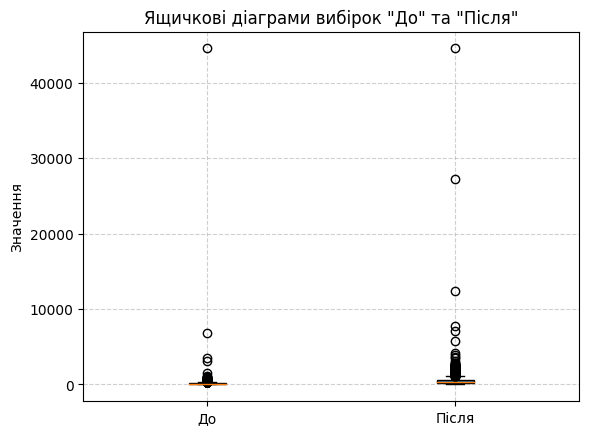

In [32]:
data = [before_data, after_data]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=['До', 'Після'])

# Покращення візуалізації
ax.set_title('Ящичкові діаграми вибірок "До" та "Після"')
ax.set_ylabel ('Значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 4.5. Сформувати нульову та альтернативну гіпотези.

Нульова гіпотеза (H0): Середні значення двох вибірок не відрізняються. Іншими словами, будь-яка різниця між вибірками "До" та "Після" випадкова або незначна.

Альтернативна гіпотеза (H1): Середні значення двох вибірок відрізняються. Це означає, що спостережувані різниці в значеннях між вибірками "До" та "Після" є статистично значущими.

In [33]:
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(before_data, after_data)
print(f"Статистика тесту: {t_statistic:.10f};\np-value: {p_value:.10f}")

Статистика тесту: -61.8060349971;
p-value: 0.0000000000


p-значення < 0.05, тому відкидаємо нульову гіпотезу та приймає альтернативну, що означає, що значення між вибірками "До" та "Після" є статистично значущими.

#### До практичної роботи №7(Перевірка непараметричного тесту критерій Вілксона для парних вибірок)

In [34]:
from scipy.stats import wilcoxon

w_statistic, w_p_value = wilcoxon(before_data, after_data)

print(f"Статистика Вілкоксона: {w_statistic:.10f};\np-value: {w_p_value:.10f}")

Статистика Вілкоксона: 0.0000000000;
p-value: 0.0000000000


Знову ж таки, значення p-value значно менше 0.05, що також підтверджує статистично значущу різницю між вибірками "до" та "після" за непараметричним критерієм.

#### Висновок

Обидва тести підтвердили статистично значущу різницю між вибірками "до" та "після". Це свідчить про ефективність втручання або змін, які впливали на досліджувані показники. Результати є робастними, оскільки обидва тести (параметричний і непараметричний) досягли однакових висновків.

### Додатково

у даному пункті проведемо побудову групових ящиків з вусами для всіх груп, спочатку для однієї групи, але з різною кількісною змінною. Потім проведемо очищення даних від викидів та побудуємо груповий ящик з вусами для всіх груп та кількісних змінних(початкова/модифікована)

In [ ]:
before_data = melb[melb["Type"] == "h"]["BuildingArea"]
after_data = melb[melb["Type"] == "h"]["NewBuildingArea"]

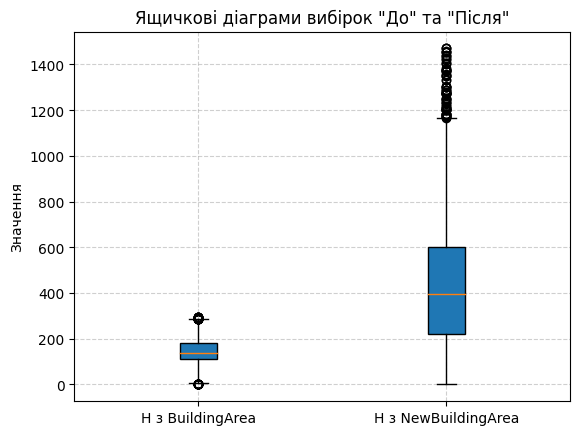

In [ ]:
data = [before_data, after_data]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=['H з BuildingArea', 'H з NewBuildingArea'])

# Покращення візуалізації
ax.set_title('Ящичкові діаграми вибірок "До" та "Після"')
ax.set_ylabel ('Значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
before_data = melb[melb["Type"] == "u"]["BuildingArea"]
after_data = melb[melb["Type"] == "u"]["NewBuildingArea"]

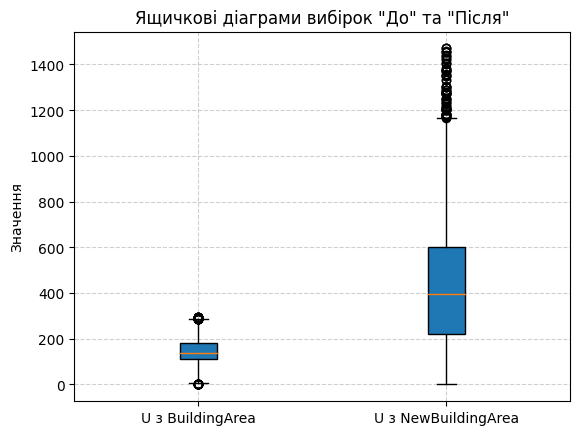

In [ ]:
data = [before_data, after_data]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=['U з BuildingArea', 'U з NewBuildingArea'])

# Покращення візуалізації
ax.set_title('Ящичкові діаграми вибірок "До" та "Після"')
ax.set_ylabel ('Значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Очищення від викидів

In [ ]:
Q1 = melb["BuildingArea"].quantile(0.25)
Q3 = melb["BuildingArea"].quantile(0.75)
IQR = Q3 - Q1

# Визначення меж
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

# Фільтрація
before_melb = melb[(melb["BuildingArea"] >= low) & (melb["BuildingArea"] <= upp)]

In [ ]:
before_h = before_melb[before_melb["Type"] == "h"]["BuildingArea"]
before_u = before_melb[before_melb["Type"] == "u"]["BuildingArea"]

In [ ]:
Q1 = melb["NewBuildingArea"].quantile(0.25)
Q3 = melb["NewBuildingArea"].quantile(0.75)
IQR = Q3 - Q1

# Визначення меж
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

# Фільтрація
after_melb = melb[(melb["NewBuildingArea"] >= low) & (melb["NewBuildingArea"] <= upp)]

In [ ]:
after_h = after_melb[after_melb["Type"] == "h"]["NewBuildingArea"]
after_u = after_melb[after_melb["Type"] == "u"]["NewBuildingArea"]

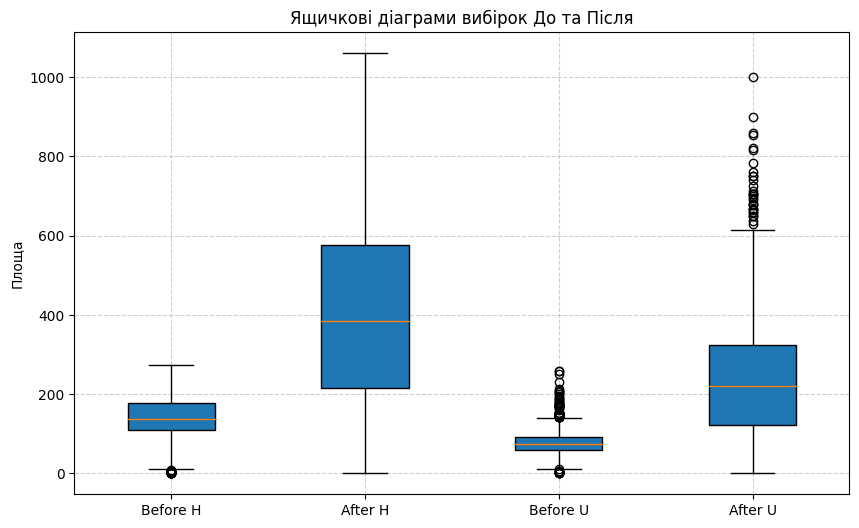

In [ ]:
data = [before_h, after_h, before_u, after_u]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, patch_artist=True, labels=["Before H", "After H", "Before U", "After U"])


ax.set_title("Ящичкові діаграми вибірок До та Після")
ax.set_ylabel("Площа")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Практична робота №6

## Імпорт основних модулів

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1.Відібрати на Kaggle.com набір даних, який містить як мінімум 2 категоріальні змінні та одну кількісну. Якщо категоріальна змінна містить більше ніж 3 градації - залишити лише ті групи є найбільшими.

Завантаження даних

In [38]:
wine = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/Data/winequalityN.csv")

Переглянемо завантаженні дані командою .head() та виберемо лише ті дані, які відповідають умові

In [39]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Ми бачимо, що завантажений датасет має лише одну категоріальну змінну, а для того, щоб виконати дану роботу потрібно як мінімум 2. Тому візмьмемо кількісну змінну `alcohol` та зроби з неї категоріальну.

Перетворення `alcohol` на категоріальну змінну.
Це можна наступним чином, поділивши  на три категорії:
- низький/low: алкоголь < 10%
- середній/medium 10% ≤ алкоголь < 12%
- високий/high: алкоголь ≥ 12%

In [40]:
low_threshold = 10.0
high_threshold = 12.0


# Тут ми створюємо нову колонку вже з категоріальною змінною
wine["alcohol_category"] = wine["alcohol"].apply(lambda x: 'low' if x < low_threshold
                                                           else ('medium' if x < high_threshold else 'high'))


Отже, тепер виведемо лише дані, які будемо використовувати

In [41]:
wine[["type", "alcohol", "alcohol_category", "quality"]]

,type,alcohol,alcohol_category,quality
0,white,8.8,low,6
1,white,9.5,low,6
2,white,10.1,medium,6
3,white,9.9,low,6
4,white,9.9,low,6
...,...,...,...,...
6492,red,10.5,medium,5
6493,red,11.2,medium,6
6494,red,11.0,medium,6
6495,red,10.2,medium,5


`alcohol` виводимо для того, щоб переконатись, що категоріальні значенн `alcohol_category` присвоюються правильно.

## 2.Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

Розмір вибірки > 5000, тому для перевірки розподілу на нормальність спробуємо використати тест Андерсона - Дарлінга.

Нульова гіпотеза (H0): Вибірка походить з певного теоретичного розподілу (наприклад, нормального, експоненційного тощо).

Альтернативна гіпотеза (H1): Вибірка не походить з цього теоретичного розподілу.



In [42]:
import scipy.stats as stats
from scipy import stats

In [43]:
# Перевірка на нормальність за допомогою тесту Андерсона-Дарлінга
result = stats.anderson(wine["quality"], dist='norm')

print(f'Statistic: {result.statistic}')
for i in range(len(result.critical_values)):
  sl, cv = result. significance_level[i], result.critical_values[i]
  if result.statistic < cv:
    print(f'На рівні значущості {sl}% дані слідують нормальному розподілу, critical value = {cv}.')
  else:
      print(f'На рівні значущості {sl}% дані не слідують нормальному розподілу, critical value = {cv}.')


Statistic: 367.16663783139484
На рівні значущості 15.0% дані не слідують нормальному розподілу, critical value = 0.576.
На рівні значущості 10.0% дані не слідують нормальному розподілу, critical value = 0.656.
На рівні значущості 5.0% дані не слідують нормальному розподілу, critical value = 0.787.
На рівні значущості 2.5% дані не слідують нормальному розподілу, critical value = 0.917.
На рівні значущості 1.0% дані не слідують нормальному розподілу, critical value = 1.091.


Ми використали тест Андерсона-Дарлінга для перевірки нормальності розподілу якості вина. За результатами тесту, ми можемо сказати, про невідповідність даних нормальному розподілу на різних рівнях значущості.

## 3.Дати коротку характеристику кожній з груп за кількісною: розрахувати кількість спостережень, середнє значення та стандартне відхилення. Аналіз робити при розділенні на групи спочатку окремо за категоріальними змінними (наприклад, оцінити групи окремо при розділенні на стать і окремо на діагноз), а потім сумісно (наприклад, стать та діагноз одночасно).

### Розділенні на групи спочатку окремо за категоріальними змінними

Вид/тип до якості

In [44]:
wine_type = wine.groupby("type")["quality"].agg(["count", "mean", "std"])
print("Аналіз за типом вина:")
wine_type

Аналіз за типом вина:


,count,mean,std
type,,,
red,1599,5.636023,0.807569
white,4898,5.877909,0.885639


Міцність до якості

In [45]:
wine_alcohol_category = wine.groupby("alcohol_category")["quality"].agg(['count', 'mean', 'std'])
print("Аналіз за категорією алкоголю:")
wine_alcohol_category

Аналіз за категорією алкоголю:


,count,mean,std
alcohol_category,,,
high,975,6.536410,0.813425
low,2603,5.447945,0.714325
medium,2919,5.908873,0.847882


### Загальний

In [46]:
grouped = wine.groupby(["type", "alcohol_category"])["quality"].agg(['count', 'mean', 'std'])
print("Сумісний аналіз за типом вина і категорією алкоголю:")
grouped

Сумісний аналіз за типом вина і категорією алкоголю:


count      mean       std
type  alcohol_category                           
red   high                162  6.419753  0.761890
      low                 680  5.266176  0.600469
      medium              757  5.800528  0.805799
white high                813  6.559656  0.821776
      low                1923  5.512220  0.739991
      medium             2162  5.946809  0.859087

Висновок:
- Вино з високим вмістом алкоголю має вищу середню оцінку якості в обох категоріях (червоне та біле), порівняно з винами з низьким та середнім вмістом алкоголю.
- Біле вино в цілому має вищі середні оцінки якості порівняно з червоним вином у всіх категоріях алкоголю.
- Стандартні відхилення вказують на помірну варіабельність оцінок якості в усіх групах, з незначною тенденцією до більшої варіабельності серед білих вин порівняно з червоними.

## 4.Візуалізувати групи за допомогою ящикових діаграм.

#### Ящикова діаграма для типу вина до якості

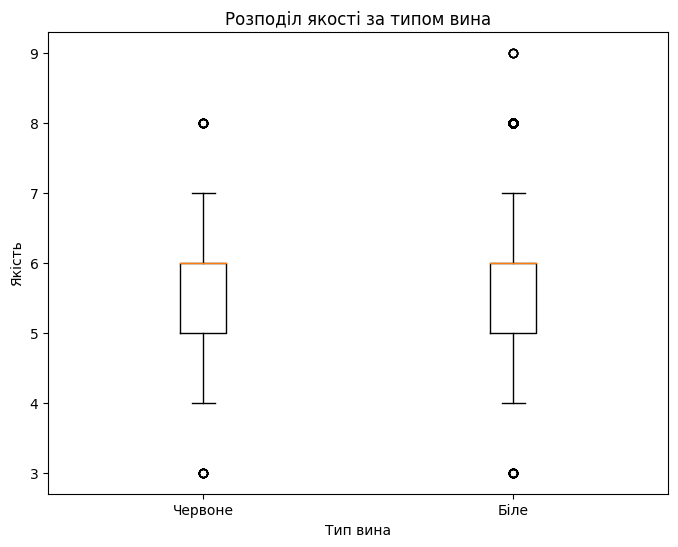

In [47]:
# Ящикова діаграма для типу вина до якості
plt.figure(figsize=(8, 6))
plt.boxplot([wine[wine['type'] == 'red']["quality"],
             wine[wine['type'] == 'white']["quality"]],
            labels=['Червоне', 'Біле'])
plt.title('Розподіл якості за типом вина')
plt.xlabel('Тип вина')
plt.ylabel('Якість')
plt.show()

#### Ящикова діаграма для міцності алкоголю до якості

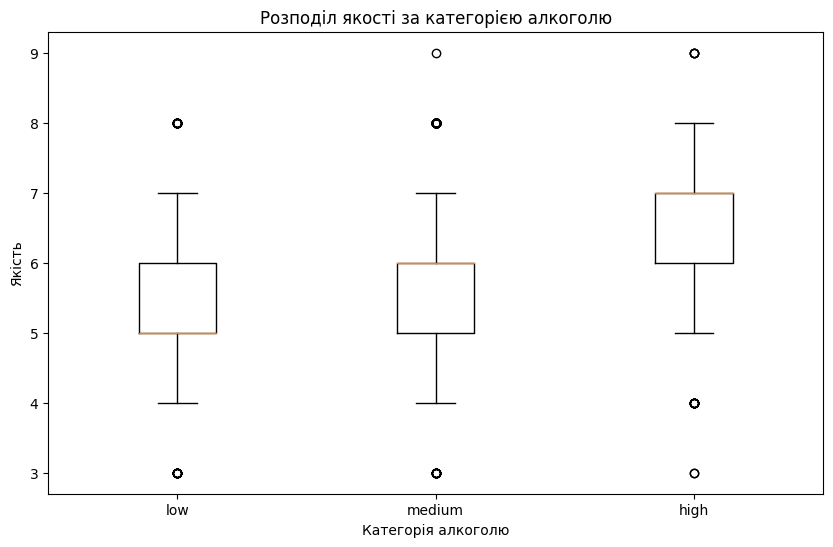

In [48]:
alcohol_levels = wine['alcohol_category'].unique()
plot = [wine[wine['alcohol_category'] == level]["quality"] for level in alcohol_levels]

# Ящикова діаграма для міцності алкоголю до якості
plt.figure(figsize=(10, 6))
plt.boxplot(plot, labels=alcohol_levels)
plt.title('Розподіл якості за категорією алкоголю')
plt.xlabel('Категорія алкоголю')
plt.ylabel('Якість')
plt.show()

## 5.Сформувати нульову та альтернативну гіпотези.

Нульова гіпотеза (H0):
Для типу вина: Немає статистично значущої різниці в середніх оцінках якості між червоним та білим винами.
Для категорії алкоголю: Немає статистично значущої різниці в середніх оцінках якості між різними категоріями алкоголю (низький, середній, високий).

Альтернативна гіпотеза (H1):
Для типу вина: Існує статистично значуща різниця в середніх оцінках якості між червоним та білим винами.
Для категорії алкоголю: Існує статистично значуща різниця в середніх оцінках якості між хоча б двома категоріями алкоголю (низький, середній, високий).

## 6.Перевірити гіпотезу та зробити висновки про те, яка саме гіпотеза підтвердилась.

Основною метою дисперсійного аналізу (ANOVA) є дослідження статистичної достовірності в відмінності між середніми за допомогою порівняння (аналізу) дисперсій. Розділення загальної дисперсії, дозволяє порівняти дисперсію залежної змінної, викликану відмінностями між групами, з дисперсією, викликаною внутрішньогруповою мінливістю. При істинності нульової гіпотези (про рівність середніх в декількох групах спостережень, вибраних з генеральної сукупності), оцінка дисперсії, пов'язаної з внутрішньогруповою мінливістю, повинна бути близькою до оцінки групової дисперсії. Якщо ви просто порівнюєте середні в двох вибірках, дисперсійний аналіз дасть той же результат, що і звичайний t-критерій для незалежних вибірок (якщо порівнюються дві незалежні групи об'єктів або спостережень) або t-критерій для залежних вибірок (якщо порівнюються дві змінні на одній і тій же множині об'єктів або спостережень).

In [49]:
from scipy.stats import f_oneway

# Проведення ANOVA тесту
f_stat, p_value = f_oneway(*[group['quality'].values for name, group in wine.groupby(['type', 'alcohol_category'])])

print(f"F-statistic: {f_stat:.4f}")
print(f"P-statistic: {p_value}")

F-statistic: 299.5880
P-statistic: 2.4137142987688234e-289


Результати тесту ANOVA (F-тесту) з величезним значенням F-статистики  і надзвичайно маленьким P-значенням вказують на дуже сильні докази проти нульової гіпотези. З таким малим P-значенням ми можемо відхилити нульову гіпотезу (H0) для обох факторів — типу вина та категорії/міцності алкоголю.

Гіптези:
Для типу вина існує статистично значуща різниця в середніх оцінках якості між червоним та білим винами. Таким чином, альтернативна гіпотеза (H1) підтверджується, а для категорії/міцності алкоголю існує статистично значуща різниця в середніх оцінках якості між різними категоріями алкоголю (низький, середній, високий). Отже, альтернативна гіпотеза (H1) також підтверджується для цього фактору

#### До практичної роботи №7(Перевірка непараметричного тесту критерій Крускала-Валлісак)

In [50]:
from scipy.stats import kruskal

# Проведення Крускал-Валліс тесту
h_stat, p_value = kruskal(*[group['quality'].values for name, group in wine.groupby(['type', 'alcohol_category'])])

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value}")

H-statistic: 1312.8459
P-value: 1.0526260611162989e-281


Аналогічно ANOVA, результати Крускала-Валліса також підтверджують наявність статистично значущих відмінностей між групами. Висока H-статистика і дуже низьке p-значення підкреслюють, що різниці між групами є значущими.

#### Висновок

Обидва тести підтверджують альтернативну гіпотезу (H1), що статистично значущі відмінності існують між середніми оцінками якості вин, розділеними за типом вина (червоне проти білого) та категорією алкоголю (низький, середній, високий). Це дозволяє нам робити висновок про значущий вплив цих факторів на якість вина.

Такі результати демонструють консистентність між параметричними та непараметричними підходами в статистичному аналізі, підтверджуючи надійність наших висновків в умовах різних розподілів даних.

In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Об'єднуємо категоріальні змінні в одну для проведення аналізу
wine['group'] = wine['type'] + "_" + wine['alcohol_category']

# Проведення Тьюківого тесту
tukey_results = pairwise_tukeyhsd(endog=wine['quality'],   # Дані для аналізу
                                  groups=wine['group'],    # Групи для порівняння
                                  alpha=0.05)              # Рівень значущості

# Конвертація результатів тесту в DataFrame для кращої візуалізації
tukey_results_df = pd.DataFrame(data=tukey_results._results_table.data[1:],
                                columns=tukey_results._results_table.data[0])

print(tukey_results_df)

# -1.1536

        group1        group2  meandiff   p-adj   lower   upper  reject
0     red_high       red_low   -1.1536  0.0000 -1.3498 -0.9573    True
1     red_high    red_medium   -0.6192  0.0000 -0.8135 -0.4249    True
2     red_high    white_high    0.1399  0.3060 -0.0532  0.3330   False
3     red_high     white_low   -0.9075  0.0000 -1.0912 -0.7239    True
4     red_high  white_medium   -0.4729  0.0000 -0.6558 -0.2901    True
5      red_low    red_medium    0.5344  0.0000  0.4158  0.6529    True
6      red_low    white_high    1.2935  0.0000  1.1768  1.4101    True
7      red_low     white_low    0.2460  0.0000  0.1459  0.3462    True
8      red_low  white_medium    0.6806  0.0000  0.5819  0.7793    True
9   red_medium    white_high    0.7591  0.0000  0.6458  0.8725    True
10  red_medium     white_low   -0.2883  0.0000 -0.3846 -0.1920    True
11  red_medium  white_medium    0.1463  0.0002  0.0515  0.2411    True
12  white_high     white_low   -1.0474  0.0000 -1.1413 -0.9535    True
13  wh

## 7.Провести аналіз за критерієм Тьюки та сформувати висновки.

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Проведення Тьюківого тесту
tukey_results = pairwise_tukeyhsd(endog=wine['quality'],   # Дані для аналізу
                                  groups=wine['type'] + "_" + wine['alcohol_category'],    # Групи для порівняння
                                  alpha=0.05)              # Рівень значущості
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  red_high      red_low  -1.1536    0.0 -1.3498 -0.9573   True
  red_high   red_medium  -0.6192    0.0 -0.8135 -0.4249   True
  red_high   white_high   0.1399  0.306 -0.0532   0.333  False
  red_high    white_low  -0.9075    0.0 -1.0912 -0.7239   True
  red_high white_medium  -0.4729    0.0 -0.6558 -0.2901   True
   red_low   red_medium   0.5344    0.0  0.4158  0.6529   True
   red_low   white_high   1.2935    0.0  1.1768  1.4101   True
   red_low    white_low    0.246    0.0  0.1459  0.3462   True
   red_low white_medium   0.6806    0.0  0.5819  0.7793   True
red_medium   white_high   0.7591    0.0  0.6458  0.8725   True
red_medium    white_low  -0.2883    0.0 -0.3846  -0.192   True
red_medium white_medium   0.1463 0.0002  0.0515  0.2411   True
white_high    white_low  -1.0474    0.0 -1.1413 -0.9535

#### Виcновок

Огляд досліджень вказує на важливість вмісту алкоголю у визначенні якості вина, як для червоного, так і для білого. Загалом, вина з вищим вмістом алкоголю мають тенденцію до кращої якості порівняно з тими, що мають низький чи середній вміст алкоголю. Це спостерігається як у червоному, так і в білому вині, де високий вміст алкоголю асоціюється з вищою якістю. Також важливо відзначити, що не існує статистично значущої різниці в якості між червоним та білим вином з однаковим високим вмістом алкоголю, підкреслюючи, що алкогольний градус може мати більше значення для якості, ніж сам колір вина.

З іншого боку, серед червоного вина існують значущі різниці у якості між різними рівнями алкогольного вмісту, зокрема, червоне вино з низьким вмістом алкоголю має нижчу якість порівняно з середнім та високим вмістом алкоголю. Для білого вина, аналогічно, вища якість спостерігається у вин з вищим вмістом алкоголю порівняно з тими, що мають низький чи середній вміст.

Загальний висновок полягає в тому, що вміст алкоголю є значущим показником якості вина, незалежно від його кольору. Вищий вміст алкоголю асоціюється з вищою якістю, тоді як вина з низьким вмістом алкоголю, як правило, мають нижчу оцінку якості. Це підкреслює важливість врахування вмісту алкоголю при оцінці якості вина.